## MNIST Handwritten Digit Classifier
- This is the "hello world" of neural nets and image classification
- Good place to start

### Vocabulary and concepts
- tensors
- gradient descent
- loss function
- optimizer
- metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Already pre-processed vectorized, already split data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Let's take a look at a train image
print(train_images.shape)

(60000, 28, 28)


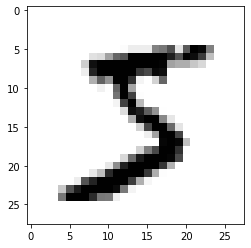

Train label: 5


In [4]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", train_labels[0])

### Image tensors are 4D tensors
- samples
- height
- width
- chanels (RGB, Grayscale, etc...)

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

In [6]:
# How do we setup other metrics?
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Pay attention to haow tas the loss number decreases, accuracy increases, that's the "learning"
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5


In [ ]:
loss, accuracy = network.evaluate(test_images, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)